In [357]:
### Import all the libraries needed for ML algorithm and data visualisation and EDA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

import sklearn.feature_selection
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold



import warnings
warnings.filterwarnings("ignore")
import io
import os
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn import tree
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score,classification_report, confusion_matrix
% matplotlib inline
sns.set()

In [495]:
traindata = pd.read_csv('loan-train.csv')

In [496]:
traindata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
#Loan Status = Y represents performing loans
#Loan Status = N represents non-performing loans

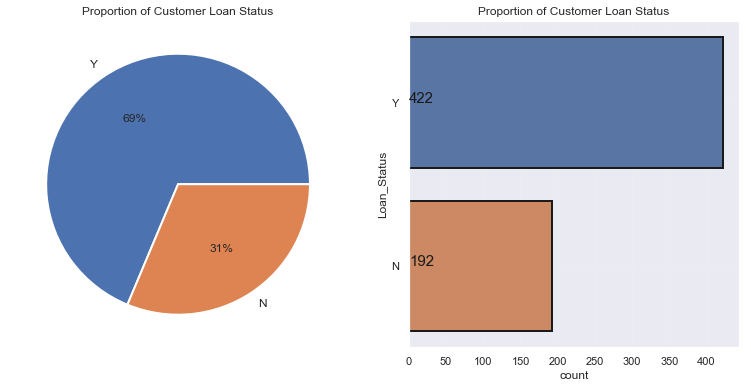

In [497]:
plt.figure(figsize=(13,6))
plt.subplot(121)
traindata["Loan_Status"].value_counts().plot.pie(autopct  = "%1.0f%%",
                                        fontsize = 12,
                                        wedgeprops = {"linewidth" : 2,
                                                      "edgecolor" : "w"},
                                       )
plt.title("Proportion of Customer Loan Status")
plt.ylabel("")

plt.subplot(122)
ax = sns.countplot(y = traindata["Loan_Status"],linewidth = 2,
                   edgecolor = "k"*traindata["Loan_Status"].nunique())
for i,j in enumerate(traindata["Loan_Status"].value_counts().values) : 
    ax.text(.1,i,j,fontsize = 15,color = "k")
plt.title("Proportion of Customer Loan Status")
plt.grid(True,alpha = .1)
    
plt.show()

In [498]:
traindata.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [499]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [500]:
traindata.duplicated().sum()

0

In [501]:
traindata.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [502]:
traindata.Gender.mode()

0    Male
dtype: object

In [503]:
train_data = traindata

In [504]:
train_data.Gender.fillna('Male', inplace = True)

In [505]:
train_data.Gender.isnull().sum()

0

In [506]:
traindata.Married.mode()

0    Yes
dtype: object

In [507]:
train_data.Married.fillna('Yes', inplace = True)

In [508]:
train_data.Married.isnull().sum()

0

In [509]:
traindata.Dependents.mode()

0    0
dtype: object

In [510]:
train_data.Dependents.fillna('0', inplace = True)

In [511]:
train_data.Married.isnull().sum()

0

In [512]:
traindata.Self_Employed.mode()

0    No
dtype: object

In [513]:
train_data.Self_Employed.fillna('No', inplace = True)
train_data.Married.isnull().sum()

0

In [514]:
traindata.LoanAmount.mean()

146.41216216216216

In [515]:
train_data.LoanAmount.fillna(146.41, inplace = True)
train_data.LoanAmount.isnull().sum()

0

In [516]:
traindata.Loan_Amount_Term.mean()

342.0

In [517]:
train_data.Loan_Amount_Term.fillna(342.20, inplace = True)
train_data.Loan_Amount_Term.isnull().sum()

0

In [518]:
traindata.Credit_History.mode()

0    1.0
dtype: float64

In [519]:
train_data.Credit_History.fillna(1.0, inplace = True)
train_data.Credit_History.isnull().sum()

0

In [520]:
# Try to visualise the data to identify which variables to transform

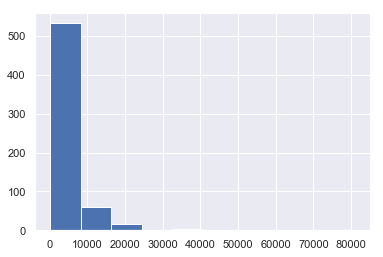

In [521]:
train_data['ApplicantIncome'].hist()
plt.show()

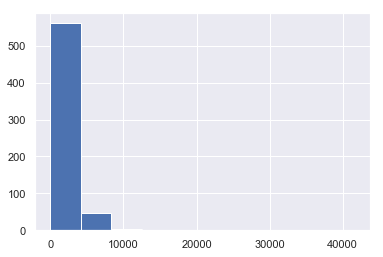

In [522]:
train_data['CoapplicantIncome'].hist()
plt.show()

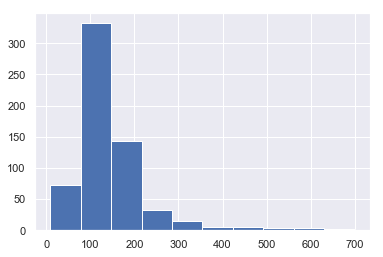

In [523]:
train_data['LoanAmount'].hist()
plt.show()

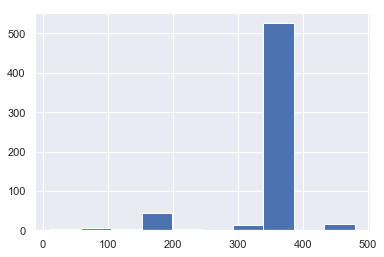

In [524]:
train_data['Loan_Amount_Term'].hist()
plt.show()

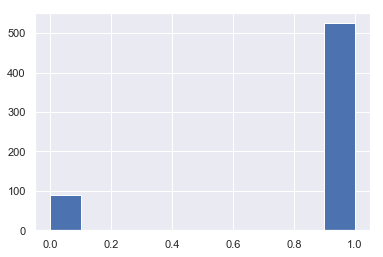

In [525]:
train_data['Credit_History'].hist()
plt.show()

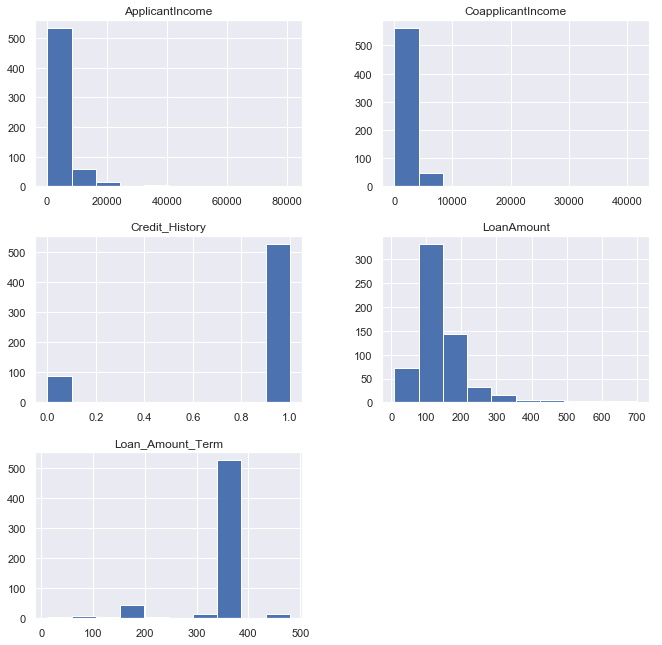

In [526]:
#Try to plot these variables in a chart to see their spread, a quick check for skeweness in the data

train_data[train_data.dtypes[(train_data.dtypes=="float64")|(train_data.dtypes=="int64")]
                        .index.values].hist(figsize=[11,11])
plt.show()

In [527]:
# To see the range of the data before dealing with outliers
print('Min ApplicantIncome =', train_data['ApplicantIncome'].min())
print('Max ApplicantIncome =',train_data['ApplicantIncome'].max())
print('ApplicantIncome range= ',train_data['ApplicantIncome'].max()- train_data['ApplicantIncome'].min())

Min ApplicantIncome = 150
Max ApplicantIncome = 81000
ApplicantIncome range=  80850


In [528]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412085,342.004560,0.855049
std,6109.041673,2926.248369,84.037468,64.372496,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [529]:
# For binning, pick between 5 - 20 and i picked 5 intervals

# Bining the Age column to handle the outliers detected by boxplot above
Income_Band_new = []
for ApplicantIncome in train_data['ApplicantIncome']:
    if ApplicantIncome >=0 and ApplicantIncome <=3200:
        Income_Band_new.append('Low Inc')
    elif ApplicantIncome >3200 and ApplicantIncome <= 5404:
        Income_Band_new.append('Mid Inc')
    elif ApplicantIncome >5404 and ApplicantIncome <= 10000:
        Income_Band_new.append('High Inc')
    else:
        Income_Band_new.append('Very High Inc')

train_data['Income_Band_new'] = np.asarray(Income_Band_new)

In [530]:
train_data['Income_Band_new'] = Income_Band_new

In [531]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_Band_new
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.41,360.0,1.0,Urban,Y,High Inc
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.00,360.0,1.0,Rural,N,Mid Inc
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.00,360.0,1.0,Urban,Y,Low Inc
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00,360.0,1.0,Urban,Y,Low Inc
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.00,360.0,1.0,Urban,Y,High Inc


In [532]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
Income_Band_new      614 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 67.2+ KB


In [533]:
new = traindata.sort_values(by = 'ApplicantIncome', ascending=1)

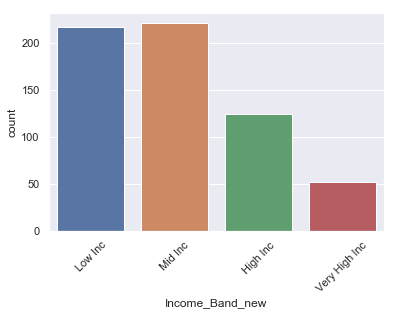

In [534]:
# We will now work with the Income_Band_new rather than ApplicantIncome going forward

ax=sns.countplot(x = 'Income_Band_new', data = traindata.sort_values(by ='ApplicantIncome'))

plt.setp(ax.get_xticklabels(), rotation=45);

In [535]:
train_data.sort_values(by = 'LoanAmount', ascending=0)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_Band_new
171,LP001585,Male,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y,Very High Inc
130,LP001469,Male,No,0,Graduate,Yes,20166,0.0,650.0,480.0,1.0,Urban,Y,Very High Inc
155,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y,Very High Inc
561,LP002813,Female,Yes,1,Graduate,Yes,19484,0.0,600.0,360.0,1.0,Semiurban,Y,Very High Inc
369,LP002191,Male,Yes,0,Graduate,No,19730,5266.0,570.0,360.0,1.0,Rural,N,Very High Inc
487,LP002547,Male,Yes,1,Graduate,No,18333,0.0,500.0,360.0,1.0,Urban,N,Very High Inc
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y,Very High Inc
177,LP001610,Male,Yes,3+,Graduate,No,5516,11300.0,495.0,360.0,0.0,Semiurban,N,High Inc
333,LP002101,Male,Yes,0,Graduate,No,63337,0.0,490.0,180.0,1.0,Urban,Y,Very High Inc
308,LP001996,Male,No,0,Graduate,No,20233,0.0,480.0,360.0,1.0,Rural,N,Very High Inc


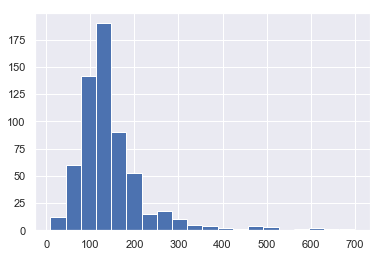

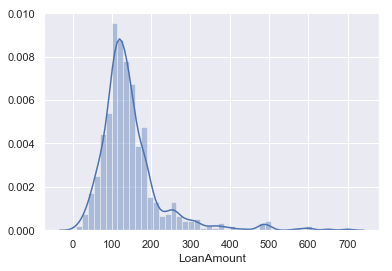

In [536]:
#before transformation

train_data['LoanAmount'].hist(bins=20)
plt.show()


sns.distplot(train_data['LoanAmount'])
plt.show()

In [537]:
# Natural Log Transformation

train_data['LoanAmount_log'] = np.log(train_data['LoanAmount'])

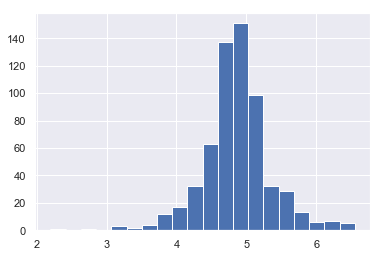

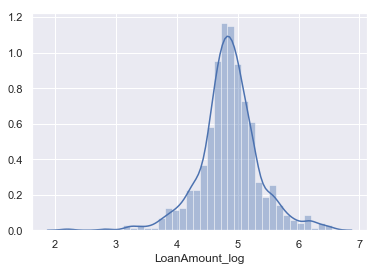

In [538]:
# After transformation
train_data['LoanAmount_log'].hist(bins=20)
plt.show()

sns.distplot(train_data['LoanAmount_log'])
plt.show()

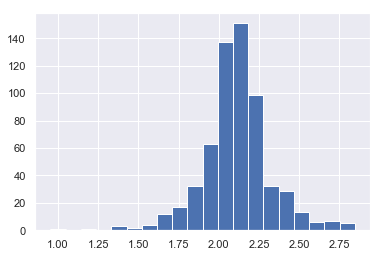

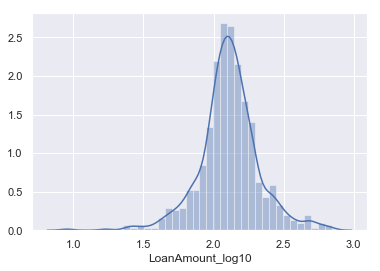

In [539]:
# Log10 Transformation
train_data['LoanAmount_log10'] = np.log10(train_data['LoanAmount'])


# After transformation
train_data['LoanAmount_log10'].hist(bins=20)
plt.show()



sns.distplot(train_data['LoanAmount_log10'])
plt.show()

In [541]:
train_data['TotalIncome'] = train_data['ApplicantIncome'] + train_data['CoapplicantIncome']

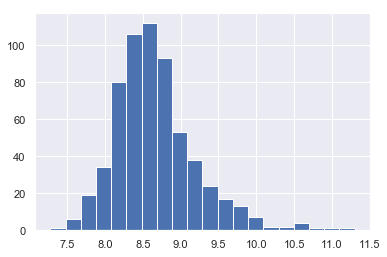

In [542]:
train_data['TotalIncome_log'] = np.log(train_data['TotalIncome'])
train_data['TotalIncome_log'].hist(bins=20)
plt.show()

In [543]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_Band_new,LoanAmount_log,LoanAmount_log10,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.41,360.0,1.0,Urban,Y,High Inc,4.986411,2.165571,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.00,360.0,1.0,Rural,N,Mid Inc,4.852030,2.107210,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.00,360.0,1.0,Urban,Y,Low Inc,4.189655,1.819544,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00,360.0,1.0,Urban,Y,Low Inc,4.787492,2.079181,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.00,360.0,1.0,Urban,Y,High Inc,4.948760,2.149219,6000.0,8.699515


In [544]:
train_data.Gender.value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [545]:
gender_cat = pd.get_dummies(train_data, columns = ['Gender'], drop_first = False)
gender_cat.head()

# one variable is removed (Gender) and two new variables have been added (Gender_Female and Gender_Male)

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_Band_new,LoanAmount_log,LoanAmount_log10,TotalIncome,TotalIncome_log,Gender_Female,Gender_Male
0,LP001002,No,0,Graduate,No,5849,0.0,146.41,360.0,1.0,Urban,Y,High Inc,4.986411,2.165571,5849.0,8.674026,0,1
1,LP001003,Yes,1,Graduate,No,4583,1508.0,128.00,360.0,1.0,Rural,N,Mid Inc,4.852030,2.107210,6091.0,8.714568,0,1
2,LP001005,Yes,0,Graduate,Yes,3000,0.0,66.00,360.0,1.0,Urban,Y,Low Inc,4.189655,1.819544,3000.0,8.006368,0,1
3,LP001006,Yes,0,Not Graduate,No,2583,2358.0,120.00,360.0,1.0,Urban,Y,Low Inc,4.787492,2.079181,4941.0,8.505323,0,1
4,LP001008,No,0,Graduate,No,6000,0.0,141.00,360.0,1.0,Urban,Y,High Inc,4.948760,2.149219,6000.0,8.699515,0,1


In [546]:
# check that you did not loose any data as result of the transformation
gender_cat.Gender_Female.value_counts()

0    502
1    112
Name: Gender_Female, dtype: int64

In [547]:
gender_cat.Gender_Male.value_counts()

1    502
0    112
Name: Gender_Male, dtype: int64

In [548]:
# the transformation we did for the Gender will be repeated for all the categorical variable
# below is a shortcut for all the variables

In [549]:
train_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Income_Band_new', 'LoanAmount_log', 'LoanAmount_log10', 'TotalIncome',
       'TotalIncome_log'],
      dtype='object')

In [552]:
train_New = pd.get_dummies(train_data, columns = ['Gender', 'Married','Dependents', 'Education',
                                               'Self_Employed','Property_Area','Income_Band_new'], drop_first = True)

In [553]:
train_New.shape

(614, 23)

In [554]:
# Have a view of the new data set 
train_New.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_log,LoanAmount_log10,TotalIncome,...,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Income_Band_new_Low Inc,Income_Band_new_Mid Inc,Income_Band_new_Very High Inc
0,LP001002,5849,0.0,146.41,360.0,1.0,Y,4.986411,2.165571,5849.0,...,0,0,0,0,0,0,1,0,0,0
1,LP001003,4583,1508.0,128.00,360.0,1.0,N,4.852030,2.107210,6091.0,...,1,0,0,0,0,0,0,0,1,0
2,LP001005,3000,0.0,66.00,360.0,1.0,Y,4.189655,1.819544,3000.0,...,0,0,0,0,1,0,1,1,0,0
3,LP001006,2583,2358.0,120.00,360.0,1.0,Y,4.787492,2.079181,4941.0,...,0,0,0,1,0,0,1,1,0,0
4,LP001008,6000,0.0,141.00,360.0,1.0,Y,4.948760,2.149219,6000.0,...,0,0,0,0,0,0,1,0,0,0


In [555]:
train_New.columns

Index(['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'LoanAmount_log',
       'LoanAmount_log10', 'TotalIncome', 'TotalIncome_log', 'Gender_Male',
       'Married_Yes', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban',
       'Income_Band_new_Low Inc', 'Income_Band_new_Mid Inc',
       'Income_Band_new_Very High Inc'],
      dtype='object')

In [558]:
# selecting features for modelling excluding the Loan Status which is our target
feature_columns = train_New[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'LoanAmount_log',
       'TotalIncome', 'TotalIncome_log', 'LoanAmount_log10',
       'Gender_Male', 'Married_Yes', 
       'Dependents_1', 'Dependents_2', 'Dependents_3+', 
       'Education_Not Graduate',  'Self_Employed_Yes',
        'Property_Area_Semiurban', 'Property_Area_Urban',
        'Income_Band_new_Low Inc',
       'Income_Band_new_Mid Inc', 'Income_Band_new_Very High Inc']]

In [559]:
feature_columns.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,TotalIncome,TotalIncome_log,LoanAmount_log10,Gender_Male,...,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Income_Band_new_Low Inc,Income_Band_new_Mid Inc,Income_Band_new_Very High Inc
0,5849,0.0,146.41,360.0,1.0,4.986411,5849.0,8.674026,2.165571,1,...,0,0,0,0,0,0,1,0,0,0
1,4583,1508.0,128.00,360.0,1.0,4.852030,6091.0,8.714568,2.107210,1,...,1,0,0,0,0,0,0,0,1,0
2,3000,0.0,66.00,360.0,1.0,4.189655,3000.0,8.006368,1.819544,1,...,0,0,0,0,1,0,1,1,0,0
3,2583,2358.0,120.00,360.0,1.0,4.787492,4941.0,8.505323,2.079181,1,...,0,0,0,1,0,0,1,1,0,0
4,6000,0.0,141.00,360.0,1.0,4.948760,6000.0,8.699515,2.149219,1,...,0,0,0,0,0,0,1,0,0,0


In [560]:
# extract the target feature

target = train_New[['Loan_Status']]
target.head()

,Loan_Status
0,Y
1,N
2,Y
3,Y
4,Y


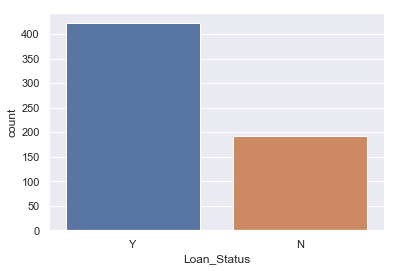

In [561]:
# To visually check distribution of the target in the whole data 

sns.countplot(x='Loan_Status',data=train_New);

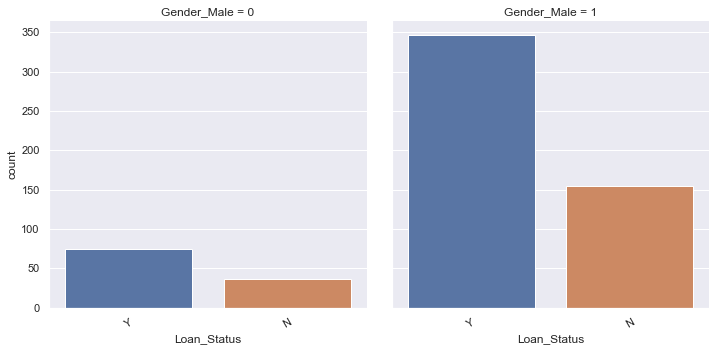

In [562]:
# To visually check distribution of the target amongs the variables
sns.factorplot(x='Loan_Status', col='Gender_Male', kind='count', data=train_New ).set_xticklabels(rotation=30);

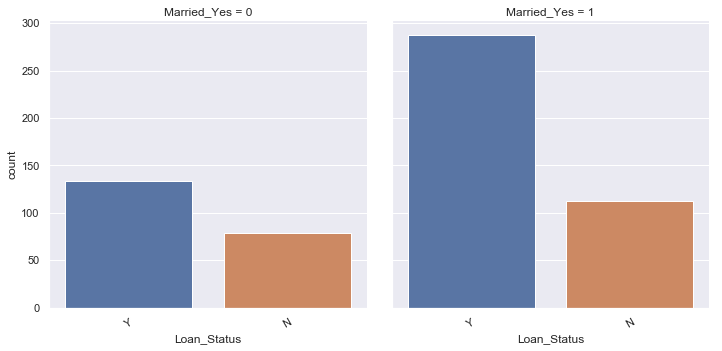

In [563]:
sns.factorplot(x='Loan_Status', col='Married_Yes', kind='count', data=train_New ).set_xticklabels(rotation=30);


# FEATURE SELECTION

In [564]:
# feature selection
# Using K Best selection

K_Best=sklearn.feature_selection.SelectKBest(k=8)
selected_features=K_Best.fit(feature_columns,target)
indices_selected=selected_features.get_support(indices=True)
chosen_cols=[feature_columns.columns[i] for i in indices_selected]


In [565]:
chosen_cols

['CoapplicantIncome',
 'Credit_History',
 'LoanAmount_log',
 'Married_Yes',
 'Dependents_2',
 'Education_Not Graduate',
 'Property_Area_Semiurban',
 'Property_Area_Urban']

In [566]:
X = train_New[chosen_cols]

In [567]:
X.head()

,CoapplicantIncome,Credit_History,LoanAmount_log,Married_Yes,Dependents_2,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban
0,0.0,1.0,4.986411,0,0,0,0,1
1,1508.0,1.0,4.852030,1,0,0,0,0
2,0.0,1.0,4.189655,1,0,0,0,1
3,2358.0,1.0,4.787492,1,0,1,0,1
4,0.0,1.0,4.948760,0,0,0,0,1


In [568]:
y = target['Loan_Status']

In [569]:
y.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [570]:
## for splitting our data for modelling, we import the model_selection module

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42)

# everytime you run train_test_split without specifying random_state, you will get a different result
# random_state is used to guarantee you have the same set of data each time

In [571]:
#check to see how much data you have in train and in test
X_train.shape

(368, 8)

In [572]:
X_test.shape

(246, 8)

In [573]:
y_train.shape

(368,)

In [574]:
y_test.shape

(246,)

# MODELLING

## Random Forest

In [575]:
# Instantiating the Algorithm and setting its parameters

randForest = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, 
                                    max_features=1)

In [576]:
#Train often referred to as fit the model

randForest.fit(X_train,y_train.values)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features=1, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=25,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [577]:
# Now the model has learned from the training data, lets see how it does with the testing data

y_pred_RF  = randForest.predict(X_test)

In [578]:
randForestScore = accuracy_score(y_test,y_pred_RF)

In [579]:
print("The Random forest accuraccy score is:", randForestScore)

The Random forest accuraccy score is: 0.7682926829268293


In [580]:
pd.crosstab(y_test, y_pred_RF, rownames = ['Actual'], colnames = ['Predicted'])

Predicted,N,Y
Actual,,
N,30,55
Y,2,159


In [581]:
# Plot Normalized confusion matrix
conf_m = confusion_matrix(y_test, y_pred_RF)
cf_mat_p = conf_m/conf_m.sum()

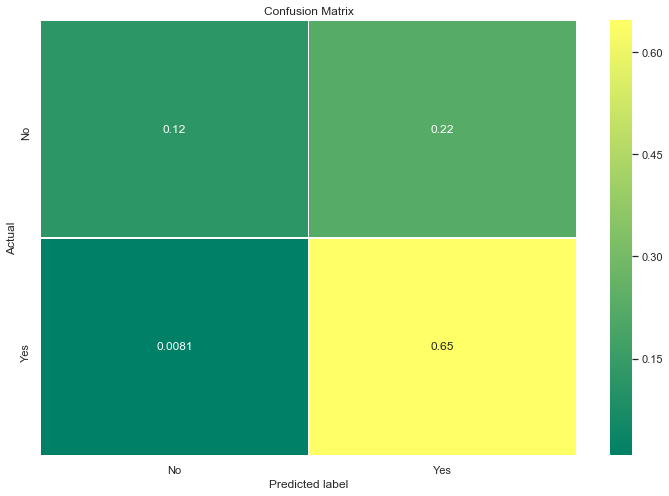

In [582]:
plt.figure(figsize=(12,8))
sns.heatmap(cf_mat_p, annot=True, linewidths=.5, cmap=cm.summer,xticklabels=['No','Yes'], yticklabels=['No','Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix")
plt.show()

# Try Logistic Regression

In [583]:
from sklearn.linear_model import LogisticRegression

In [584]:
##Instantiating the model

logReg = LogisticRegression()

In [585]:
## Train the model

logReg.fit(X_train,y_train.values)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [586]:
##Test the model

logReg_predict =logReg.predict(X_test)

In [587]:
accuracy_score(y_test,logReg_predict)

0.7967479674796748

In [588]:
pd.crosstab(y_test,logReg_predict, rownames = ['Actual'], colnames = ['Predicted'])

Predicted,N,Y
Actual,,
N,37,48
Y,2,159


# Try with Decision Tree

In [589]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [590]:
#Instantiating the Algorithm
DecTree = tree.DecisionTreeClassifier(max_depth=10,max_features=4 )

In [591]:
#Train the Model
DecTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [592]:
# Test the model
DecTree_pred = DecTree.predict(X_test)

In [593]:
X_test.columns

Index(['CoapplicantIncome', 'Credit_History', 'LoanAmount_log', 'Married_Yes',
       'Dependents_2', 'Education_Not Graduate', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [594]:
accuracy_score(y_test,DecTree_pred)

0.7520325203252033

In [595]:
pd.crosstab(y_test,DecTree_pred, rownames = ['Actual'], colnames = ['Predicted'])

Predicted,N,Y
Actual,,
N,40,45
Y,16,145


In [597]:
import graphviz 

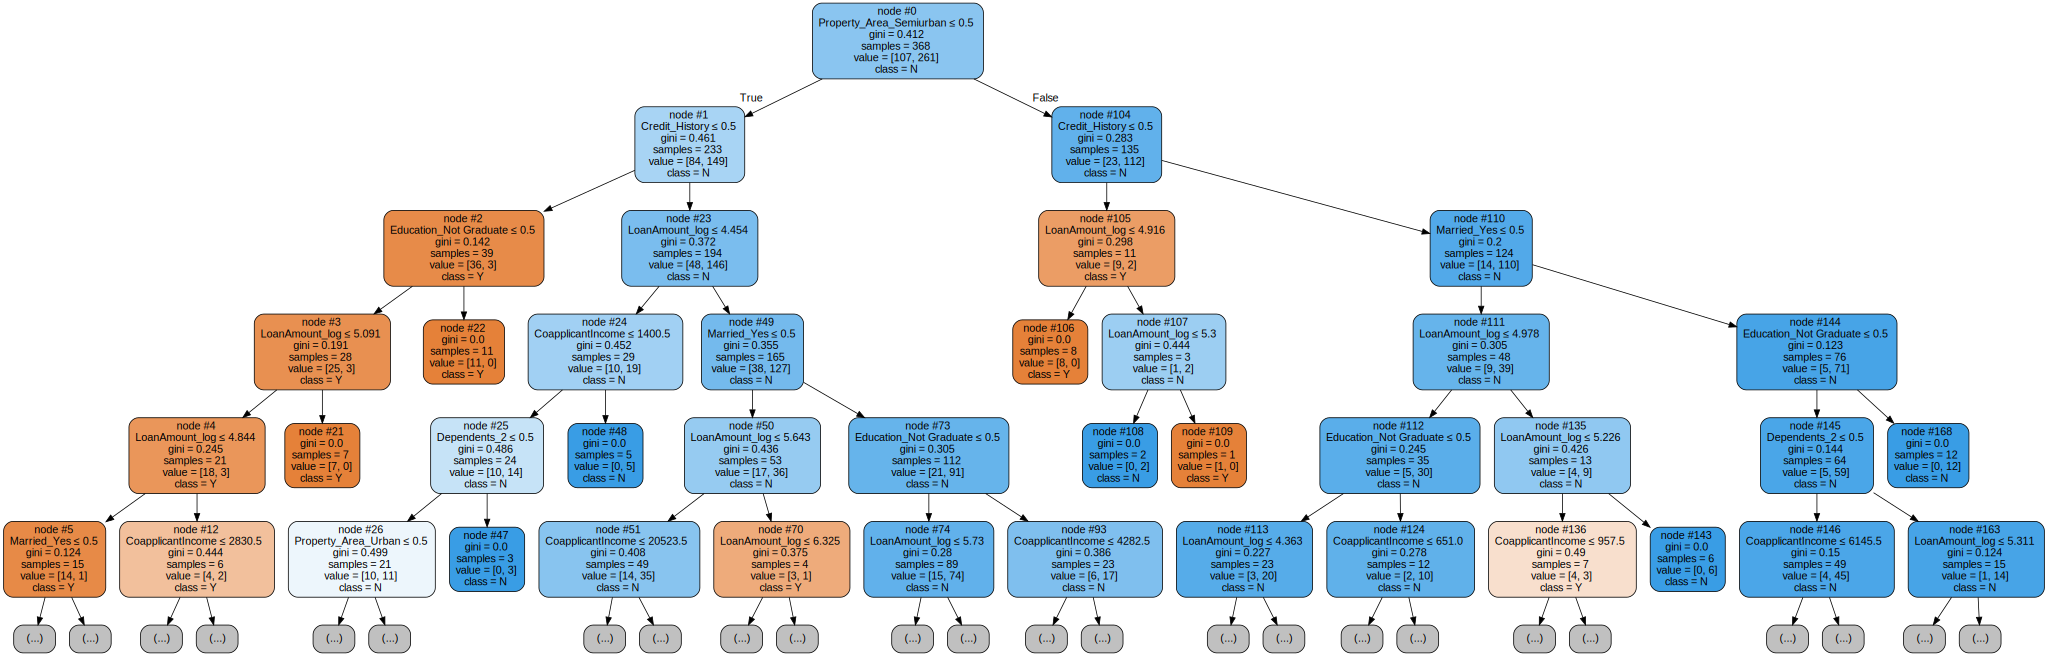

In [599]:
dot_data = tree.export_graphviz(DecTree, out_file=None, feature_names=chosen_cols,class_names=target['Loan_Status'], filled=True,
                                rounded=True,special_characters=True, label='all', max_depth=5,node_ids=True, rotate=False)  
graph = graphviz.Source(dot_data)  
graph 

In [600]:
# To Export the Visualization
dot_data = tree.export_graphviz(DecTree, out_file=None, feature_names=chosen_cols,class_names=target['Loan_Status'], filled=True,
                                rounded=True,special_characters=True, label='all', max_depth=5,node_ids=True, rotate=False) 
graph = graphviz.Source(dot_data) 
graph.render("DecTree_Model") 

#check your working directory for the below pdf file

'DecTree_Model.pdf'

# Let us Complete the same task with K Nearest Neighbour (KNN)

In [601]:
from sklearn.neighbors import KNeighborsClassifier

In [602]:
#Instantiating the Algorithm
knn = KNeighborsClassifier(n_neighbors =5)


In [603]:
#Train the Model
knn.fit(X_train,y_train.values)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [604]:
# Test the model
KNN_pred = knn.predict(X_test)

In [605]:
accuracy_score(y_test,KNN_pred)

0.6544715447154471

In [606]:
pd.crosstab(y_test,KNN_pred, rownames = ['Actual'], colnames = ['Predicted'])

Predicted,N,Y
Actual,,
N,17,68
Y,17,144


In [607]:
# Results From All the Models Built

print('KNN : ',accuracy_score(y_test,KNN_pred)  )
print('Decision Tree: ', accuracy_score(y_test,DecTree_pred))
print('Log_Reg: ', accuracy_score(y_test,logReg_predict))
print('R_Forest: ',accuracy_score(y_test,y_pred_RF))

KNN :  0.6544715447154471
Decision Tree:  0.7520325203252033
Log_Reg:  0.7967479674796748
R_Forest:  0.7682926829268293


# CROSS VALIDATION 

In [608]:
validation_size = 0.40
seed = 7
scoring = 'accuracy'

In [609]:
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)


In [610]:
models = []
models.append(('LR_cv', LogisticRegression()))
models.append(('KNN_cv', KNeighborsClassifier()))
models.append(('RF_cv', RandomForestClassifier()))
models.append(('DT_cv', DecisionTreeClassifier()))

In [611]:
# TRAIN THE MODEL WITH CROSS_VAL TRAINING Set and evaluate each sample in turn () mean and std deviation
results = []
names = []
for name, model in models:
       
    kfold = model_selection.KFold(n_splits=10, random_state=seed)

    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR_cv: 0.815315 (0.061169)
KNN_cv: 0.706381 (0.062169)
RF_cv: 0.733483 (0.058798)
DT_cv: 0.700901 (0.068112)


In [612]:
# Make predictions on validation dataset:
            #Logistic Regresson was the most accurate model that we trained. Now we want to get an idea of the accuracy of 
            #the model on our validation set
LR_cv = LogisticRegression()
LR_cv.fit(X_train, Y_train)

LR_cv_pred = LR_cv.predict(X_validation)
print(accuracy_score(Y_validation, LR_cv_pred))
print(confusion_matrix(Y_validation, LR_cv_pred))
print(classification_report(Y_validation, LR_cv_pred))

0.8089430894308943
[[ 35  45]
 [  2 164]]
             precision    recall  f1-score   support

          N       0.95      0.44      0.60        80
          Y       0.78      0.99      0.87       166

avg / total       0.84      0.81      0.78       246



In [613]:
# print( LR_cv.predict_proba(X_validation))

In [614]:
# Neater Confusion Matrix
pd.crosstab(Y_validation,LR_cv_pred, rownames = ['Actual'], colnames = ['Predicted'])

Predicted,N,Y
Actual,,
N,35,45
Y,2,164


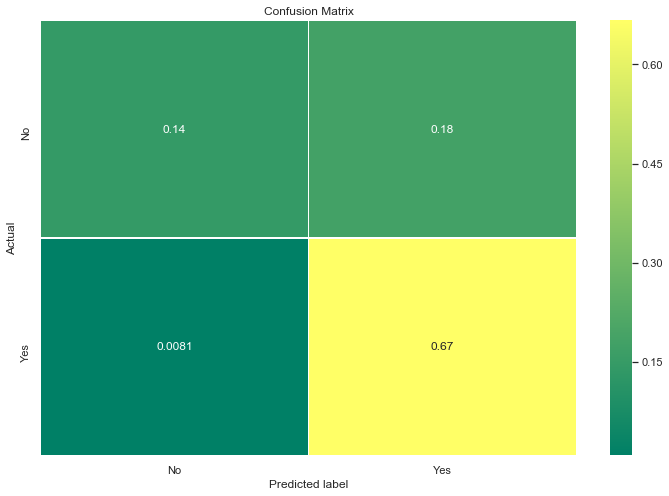

In [615]:
# Plot Normalized confusion matrix
conf_m = confusion_matrix(Y_validation, LR_cv_pred)
cf_mat_p = conf_m/conf_m.sum()

plt.figure(figsize=(12,8))
sns.heatmap(cf_mat_p, annot=True, linewidths=.5, cmap=cm.summer,xticklabels=['No','Yes'], yticklabels=['No','Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix")
plt.show()

In [616]:
# Make predictions on validation dataset:
            #Random forest was the next most accurate model that we trained. Now we want to get an idea of the accuracy of 
            #the model on our validation set
RF_cv = RandomForestClassifier()
RF_cv.fit(X_train, Y_train)

RF_cv_pred = RF_cv.predict(X_validation)
print(accuracy_score(Y_validation, RF_cv_pred))
print(confusion_matrix(Y_validation, RF_cv_pred))
print(classification_report(Y_validation, RF_cv_pred))

0.7113821138211383
[[ 46  34]
 [ 37 129]]
             precision    recall  f1-score   support

          N       0.55      0.57      0.56        80
          Y       0.79      0.78      0.78       166

avg / total       0.71      0.71      0.71       246



In [617]:
# Neater Confusion Matrix
pd.crosstab(Y_validation,RF_cv_pred, rownames = ['Actual'], colnames = ['Predicted'])

Predicted,N,Y
Actual,,
N,46,34
Y,37,129


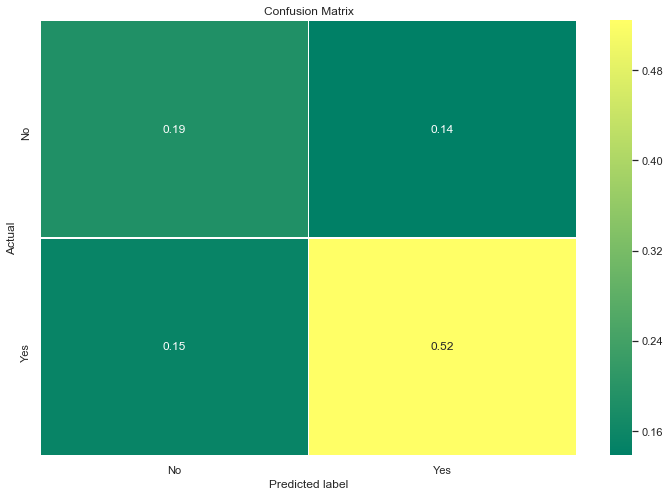

In [618]:
# Plot Normalized confusion matrix
conf_m = confusion_matrix(Y_validation, RF_cv_pred)
cf_mat_p = conf_m/conf_m.sum()

plt.figure(figsize=(12,8))
sns.heatmap(cf_mat_p, annot=True, linewidths=.5, cmap=cm.summer,xticklabels=['No','Yes'], yticklabels=['No','Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix")
plt.show()

# Using the Best Model (Logistic Regression) to Predict New Applicant Data

In [670]:
testData = pd.read_csv('New Loan Applicants.csv')

In [671]:
testData.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban


In [672]:
testData.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [673]:
testData.Gender.fillna("Male",inplace =True)
testData.Gender.isnull().sum()

0

In [674]:
testData.Married.fillna("Yes",inplace=True)
testData.Credit_History.fillna(1.0,inplace=True)
testData.LoanAmount.fillna(testData.LoanAmount.mean(),inplace=True)
testData.Loan_Amount_Term.fillna(testData.Loan_Amount_Term.mean(),inplace=True)
testData.Self_Employed.fillna("No",inplace=True)
testData.Dependents.fillna(0,inplace=True)

In [675]:
testDataNew = pd.get_dummies(testData, columns = ['Gender', 'Married', 'Dependents',
                                    'Education', 'Self_Employed', 'Property_Area'], drop_first= True)

In [691]:
testDataNew['LoanAmount_log10'] = np.log10(testDataNew['LoanAmount'])

In [692]:
testDataNew.head(2)

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,LoanAmount_log10
0,LP001015,5720,0,110.0,360.0,1.0,1,1,1,0,0,0,0,0,0,1,2.041393
1,LP001022,3076,1500,126.0,360.0,1.0,1,1,0,1,0,0,0,0,0,1,2.100371


In [693]:
testDataNew.columns

Index(['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Married_Yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'LoanAmount_log10'],
      dtype='object')

In [694]:
feature_columns = ['CoapplicantIncome',
 'Credit_History',
 'LoanAmount_log10',
 'Married_Yes',
 'Dependents_2',
 'Education_Not Graduate',
 'Property_Area_Semiurban',
 'Property_Area_Urban']

In [695]:
feature_columns

['CoapplicantIncome',
 'Credit_History',
 'LoanAmount_log10',
 'Married_Yes',
 'Dependents_2',
 'Education_Not Graduate',
 'Property_Area_Semiurban',
 'Property_Area_Urban']

In [696]:
New_App = testDataNew[feature_columns]

In [697]:
New_App.head(2)

,CoapplicantIncome,Credit_History,LoanAmount_log10,Married_Yes,Dependents_2,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban
0,0,1.0,2.041393,1,0,0,0,1
1,1500,1.0,2.100371,1,0,0,0,1


In [698]:
New_App_Score = LR_cv.predict(New_App)

In [699]:
New_App_Score

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [700]:
##Store the final result in a csv file to be passed to decision makers to use.

pd.DataFrame({'Loan_ID':testDataNew.Loan_ID,'Loan_Status':New_App_Score}).to_csv('Result.csv',index=False)

In [701]:
Ne = pd.DataFrame({'Loan_ID':testDataNew.Loan_ID,'Loan_Status':New_App_Score})

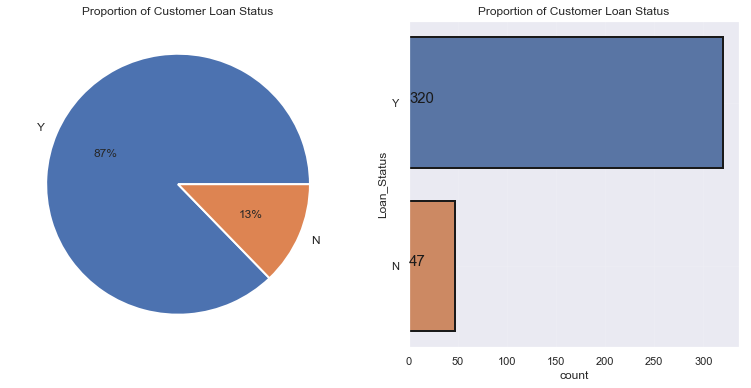

In [702]:
plt.figure(figsize=(13,6))
plt.subplot(121)
Ne["Loan_Status"].value_counts().plot.pie(autopct  = "%1.0f%%",
                                        fontsize = 12,
                                        wedgeprops = {"linewidth" : 2,
                                                      "edgecolor" : "w"},
                                       )
plt.title("Proportion of Customer Loan Status")
plt.ylabel("")

plt.subplot(122)
ax = sns.countplot(y = Ne["Loan_Status"],linewidth = 2,
                   edgecolor = "k"*Ne["Loan_Status"].nunique())
for i,j in enumerate(Ne["Loan_Status"].value_counts().values) : 
    ax.text(.1,i,j,fontsize = 15,color = "k")
plt.title("Proportion of Customer Loan Status")
plt.grid(True,alpha = .1)
    
plt.show()